In [41]:
import pandas as pd
pd.options.display.max_columns=1000


Source: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

In [42]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None)

In [43]:
df.columns = ['spam', 'text']

In [44]:
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
import string
translator = str.maketrans('', '', string.punctuation)
df.text = df.text.apply(lambda x: x.translate(translator))
#df.head()
# it's very fast 

In [46]:
df['spam'] = df['spam'] == 'spam'

In [47]:
df['spam'] = df['spam'].astype(int)

In [48]:
df.head(5)

,spam,text
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


## 1) bag of words with str.plit(), model/prediction

In [49]:
from collections import Counter
import pandas as pd

In [50]:
print(type(df.text))

<class 'pandas.core.series.Series'>


In [51]:
print(df.text[2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s


In [52]:
print(df.text[2].split())

['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075over18s']


In [53]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [54]:
# try nltk.casual_tokenize (normalize_* - regarding !!, emojis)
# UP: clean-up tokens by stripping punctuation
bows = [tknzr.tokenize(s) for s in df.text]

In [55]:
# TODO: try tf-idf vectorizer (sklearn)
# TODO: filter out low and high frequency words (min_df = 10, max_df = 0.2; try differrent values)

In [56]:
print(bows[:5])

[['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat'], ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'], ['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075', 'over', '18s'], ['U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say'], ['Nah', 'I', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']]


In [57]:
print(df.text[:5])

0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in 2 a wkly comp to win FA Cup fina...
3          U dun say so early hor U c already then say
4    Nah I dont think he goes to usf he lives aroun...
Name: text, dtype: object


In [58]:
bows = [Counter(d) for d in bows]
print(bows)

[Counter({'Go': 1, 'until': 1, 'jurong': 1, 'point': 1, 'crazy': 1, 'Available': 1, 'only': 1, 'in': 1, 'bugis': 1, 'n': 1, 'great': 1, 'world': 1, 'la': 1, 'e': 1, 'buffet': 1, 'Cine': 1, 'there': 1, 'got': 1, 'amore': 1, 'wat': 1}), Counter({'Ok': 1, 'lar': 1, 'Joking': 1, 'wif': 1, 'u': 1, 'oni': 1}), Counter({'to': 3, 'entry': 2, 'FA': 2, 'Free': 1, 'in': 1, '2': 1, 'a': 1, 'wkly': 1, 'comp': 1, 'win': 1, 'Cup': 1, 'final': 1, 'tkts': 1, '21st': 1, 'May': 1, '2005': 1, 'Text': 1, '87121': 1, 'receive': 1, 'questionstd': 1, 'txt': 1, 'rateTCs': 1, 'apply': 1, '08452810075': 1, 'over': 1, '18s': 1}), Counter({'U': 2, 'say': 2, 'dun': 1, 'so': 1, 'early': 1, 'hor': 1, 'c': 1, 'already': 1, 'then': 1}), Counter({'he': 2, 'Nah': 1, 'I': 1, 'dont': 1, 'think': 1, 'goes': 1, 'to': 1, 'usf': 1, 'lives': 1, 'around': 1, 'here': 1, 'though': 1}), Counter({'to': 2, 'FreeMsg': 1, 'Hey': 1, 'there': 1, 'darling': 1, 'its': 1, 'been': 1, '3': 1, 'weeks': 1, 'now': 1, 'and': 1, 'no': 1, 'word': 1

In [59]:
#pd.options.display.max_columns=1000
df_bows = pd.DataFrame(bows)
df_bows.head()

,0,0089my,00Please,01,0121 2025050,01223585236,01223585334,01256987,02,020603,0207 153 9153,0207 153 9996,02070836089,02072069400,02073162414,02085076972,020903,03530150,040902,050703,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,07808,07808247860,07808726822,07815296484,07821230901,0784987,07880867867,0789xxxxxxx,07946746291,0796XXXXXX,07973788240,07XXXXXXXXX,07xxxxxxxxx,08,0800,0800 0721072,0800 169 6031,0800 195 6669,0800 1956669,0800 5050,0800 542 0578,0800 542 0825,08000407165,08000776320,08000839402,08000930705,08000938767,08001950382,08002888812,08002986030,08002986906,08002988890,08006344447,0808 145 4742,08081263000,08081560665,0819,0844,08448350055,08448714184,0845 021 3680,0845 2814032,08450542832,08452810071,08452810073,08452810075,0870,08700469649,08700621170,08701213186,08701237397,08701417012,08701624,08701752560,08701872873,08702411827,08702490080,08702840625,08704439680,08706091795,08707379102,08707500020,08707509020,08707533310,08707808226,08708034412,08708800282,08709222922,08709501522,0870k,08710471114,08712101358,08712103738,08712120250,08712300220,08712317606,08712400200,08712400602,08712400603,08712402050,08712402578,08712402779,08712402902,08712402972,08712404000,08712405020,08712405022,08712460324,08712466669,08712778107,08712778108,08712778109,08714342399,08714712377,08714712379,08714712388,08714712394,08714712412,08714714011,08714719523,08714740323,08714742804,08715203028,08715203649,08715203652,08715203656,08715203677,08715203685,08715203694,08715205273,08715500022,08715705022,08717111821,08717168528,08717205546,08717507382,08717507711,08717509990,08717890890,08717895698,08717898035,08718711108,08718720201,08718723815,08718725756,08718726270,08718726970,08718726971,08718726978,08718727200,08718727868,08718727870,08718728876,08718729755,08718729758,08718730555,08718730666,08718738001,08718738002,08718738034,08719180219,08719180248,08719181259,08719181503,08719181513,08719839835,08719899217,08719899229,08719899230,09,09041940223,09050000301,09050000327,09050000332,09050000460,09050000555,09050000878,09050000928,09050001295,09050001808,09050002311,09050003091,09050005321,09050090044,09050280520,09053750005,09056242159,09057039994,09058091854,09058091870,09058094454,09058094455,09058094507,09058094565,09058094583,09058094594,09058094597,09058094599,09058095107,09058095201,09058097189,09058097218,09058098002,09058099801,09061104276,09061104283,09061209465,09061213237,09061221061,09061221066,09061701444,09061701461,09061701851,09061701939,09061702893,09061743386,09061743806,09061743810,09061743811,09061744553,09061749602,09061790121,09061790125,09061790126,09063440451,09063442151,09063458130,09063463,09064011000,09064012103,09064012160,09064015307,09064017295,09064017305,09064018838,09064019014,09064019788,09065069120,09065069154,09065171142,09065174042,09065394514,09065394973,09065989180,09065989182,09066350750,09066358152,09066358361,09066361921,09066362206,09066362220,09066362231,09066364311,09066364349,09066364589,09066368327,09066368470,09066368753,09066380611,09066382422,09066612661,09066649731,09066660100,09071512432,09071512433,09071517866,09077818151,09090204448,09090900040,09094100151,09094646631,09094646899,09095350301,09096102316,09099725823,09099726395,09099726429,09099726481,09099726553,09111030116,09111032124,09701213186,0ANETWORKS,0Hi,0pwk,0quit,1,10,100,1000,10000,100000,1000CALL,1000s,100603,100pSMS,100percentrealcom,100s,100txtmth,1010,1013,101mega,1030,10803,10K,10am,10am7pm,10am9pm,10k,10mins,10p,10pmin,10ppm,10th,11,1120,113,1131,11414,11414TCRW1,1146,1148,116,1172,118pmsg,11mths,12,120,12000pes,1205,121,1225,123,1230,125,1250,125gift,128,1282EssexCM61XN,12Mths,12hours,12hrs,12mths,12n146tf15,12n146tf150p,12price,13,130,131004,1323,1327,13404,139,140,1405 1680,140ppm,1450,146tf150p,14thMarch,150,150 0087040,1500,150Mtmsgrcvd18,15

As we can see, df_bows contains a lot of Nan's and only few non-zero values.

In [60]:
df_bows.describe()

,0,0089my,00Please,01,0121 2025050,01223585236,01223585334,01256987,02,020603,0207 153 9153,0207 153 9996,02070836089,02072069400,02073162414,02085076972,020903,03530150,040902,050703,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,07808,07808247860,07808726822,07815296484,07821230901,0784987,07880867867,0789xxxxxxx,07946746291,0796XXXXXX,07973788240,07XXXXXXXXX,07xxxxxxxxx,08,0800,0800 0721072,0800 169 6031,0800 195 6669,0800 1956669,0800 5050,0800 542 0578,0800 542 0825,08000407165,08000776320,08000839402,08000930705,08000938767,08001950382,08002888812,08002986030,08002986906,08002988890,08006344447,0808 145 4742,08081263000,08081560665,0819,0844,08448350055,08448714184,0845 021 3680,0845 2814032,08450542832,08452810071,08452810073,08452810075,0870,08700469649,08700621170,08701213186,08701237397,08701417012,08701624,08701752560,08701872873,08702411827,08702490080,08702840625,08704439680,08706091795,08707379102,08707500020,08707509020,08707533310,08707808226,08708034412,08708800282,08709222922,08709501522,0870k,08710471114,08712101358,08712103738,08712120250,08712300220,08712317606,08712400200,08712400602,08712400603,08712402050,08712402578,08712402779,08712402902,08712402972,08712404000,08712405020,08712405022,08712460324,08712466669,08712778107,08712778108,08712778109,08714342399,08714712377,08714712379,08714712388,08714712394,08714712412,08714714011,08714719523,08714740323,08714742804,08715203028,08715203649,08715203652,08715203656,08715203677,08715203685,08715203694,08715205273,08715500022,08715705022,08717111821,08717168528,08717205546,08717507382,08717507711,08717509990,08717890890,08717895698,08717898035,08718711108,08718720201,08718723815,08718725756,08718726270,08718726970,08718726971,08718726978,08718727200,08718727868,08718727870,08718728876,08718729755,08718729758,08718730555,08718730666,08718738001,08718738002,08718738034,08719180219,08719180248,08719181259,08719181503,08719181513,08719839835,08719899217,08719899229,08719899230,09,09041940223,09050000301,09050000327,09050000332,09050000460,09050000555,09050000878,09050000928,09050001295,09050001808,09050002311,09050003091,09050005321,09050090044,09050280520,09053750005,09056242159,09057039994,09058091854,09058091870,09058094454,09058094455,09058094507,09058094565,09058094583,09058094594,09058094597,09058094599,09058095107,09058095201,09058097189,09058097218,09058098002,09058099801,09061104276,09061104283,09061209465,09061213237,09061221061,09061221066,09061701444,09061701461,09061701851,09061701939,09061702893,09061743386,09061743806,09061743810,09061743811,09061744553,09061749602,09061790121,09061790125,09061790126,09063440451,09063442151,09063458130,09063463,09064011000,09064012103,09064012160,09064015307,09064017295,09064017305,09064018838,09064019014,09064019788,09065069120,09065069154,09065171142,09065174042,09065394514,09065394973,09065989180,09065989182,09066350750,09066358152,09066358361,09066361921,09066362206,09066362220,09066362231,09066364311,09066364349,09066364589,09066368327,09066368470,09066368753,09066380611,09066382422,09066612661,09066649731,09066660100,09071512432,09071512433,09071517866,09077818151,09090204448,09090900040,09094100151,09094646631,09094646899,09095350301,09096102316,09099725823,09099726395,09099726429,09099726481,09099726553,09111030116,09111032124,09701213186,0ANETWORKS,0Hi,0pwk,0quit,1,10,100,1000,10000,100000,1000CALL,1000s,100603,100pSMS,100percentrealcom,100s,100txtmth,1010,1013,101mega,1030,10803,10K,10am,10am7pm,10am9pm,10k,10mins,10p,10pmin,10ppm,10th,11,1120,113,1131,11414,11414TCRW1,1146,1148,116,1172,118pmsg,11mths,12,120,12000pes,1205,121,1225,123,1230,125,1250,125gift,128,1282EssexCM61XN,12Mths,12hours,12hrs,12mths,12n146tf15,12n146tf150p,12price,13,130,131004,1323,1327,13404,139,140,1405 1680,140ppm,1450,146tf150p,14thMarch,150,150 0087040,1500,150Mtmsgrcvd18,15

In [61]:
df_bows = df_bows.fillna(0)
df_bows.head()

,0,0089my,00Please,01,0121 2025050,01223585236,01223585334,01256987,02,020603,0207 153 9153,0207 153 9996,02070836089,02072069400,02073162414,02085076972,020903,03530150,040902,050703,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,07808,07808247860,07808726822,07815296484,07821230901,0784987,07880867867,0789xxxxxxx,07946746291,0796XXXXXX,07973788240,07XXXXXXXXX,07xxxxxxxxx,08,0800,0800 0721072,0800 169 6031,0800 195 6669,0800 1956669,0800 5050,0800 542 0578,0800 542 0825,08000407165,08000776320,08000839402,08000930705,08000938767,08001950382,08002888812,08002986030,08002986906,08002988890,08006344447,0808 145 4742,08081263000,08081560665,0819,0844,08448350055,08448714184,0845 021 3680,0845 2814032,08450542832,08452810071,08452810073,08452810075,0870,08700469649,08700621170,08701213186,08701237397,08701417012,08701624,08701752560,08701872873,08702411827,08702490080,08702840625,08704439680,08706091795,08707379102,08707500020,08707509020,08707533310,08707808226,08708034412,08708800282,08709222922,08709501522,0870k,08710471114,08712101358,08712103738,08712120250,08712300220,08712317606,08712400200,08712400602,08712400603,08712402050,08712402578,08712402779,08712402902,08712402972,08712404000,08712405020,08712405022,08712460324,08712466669,08712778107,08712778108,08712778109,08714342399,08714712377,08714712379,08714712388,08714712394,08714712412,08714714011,08714719523,08714740323,08714742804,08715203028,08715203649,08715203652,08715203656,08715203677,08715203685,08715203694,08715205273,08715500022,08715705022,08717111821,08717168528,08717205546,08717507382,08717507711,08717509990,08717890890,08717895698,08717898035,08718711108,08718720201,08718723815,08718725756,08718726270,08718726970,08718726971,08718726978,08718727200,08718727868,08718727870,08718728876,08718729755,08718729758,08718730555,08718730666,08718738001,08718738002,08718738034,08719180219,08719180248,08719181259,08719181503,08719181513,08719839835,08719899217,08719899229,08719899230,09,09041940223,09050000301,09050000327,09050000332,09050000460,09050000555,09050000878,09050000928,09050001295,09050001808,09050002311,09050003091,09050005321,09050090044,09050280520,09053750005,09056242159,09057039994,09058091854,09058091870,09058094454,09058094455,09058094507,09058094565,09058094583,09058094594,09058094597,09058094599,09058095107,09058095201,09058097189,09058097218,09058098002,09058099801,09061104276,09061104283,09061209465,09061213237,09061221061,09061221066,09061701444,09061701461,09061701851,09061701939,09061702893,09061743386,09061743806,09061743810,09061743811,09061744553,09061749602,09061790121,09061790125,09061790126,09063440451,09063442151,09063458130,09063463,09064011000,09064012103,09064012160,09064015307,09064017295,09064017305,09064018838,09064019014,09064019788,09065069120,09065069154,09065171142,09065174042,09065394514,09065394973,09065989180,09065989182,09066350750,09066358152,09066358361,09066361921,09066362206,09066362220,09066362231,09066364311,09066364349,09066364589,09066368327,09066368470,09066368753,09066380611,09066382422,09066612661,09066649731,09066660100,09071512432,09071512433,09071517866,09077818151,09090204448,09090900040,09094100151,09094646631,09094646899,09095350301,09096102316,09099725823,09099726395,09099726429,09099726481,09099726553,09111030116,09111032124,09701213186,0ANETWORKS,0Hi,0pwk,0quit,1,10,100,1000,10000,100000,1000CALL,1000s,100603,100pSMS,100percentrealcom,100s,100txtmth,1010,1013,101mega,1030,10803,10K,10am,10am7pm,10am9pm,10k,10mins,10p,10pmin,10ppm,10th,11,1120,113,1131,11414,11414TCRW1,1146,1148,116,1172,118pmsg,11mths,12,120,12000pes,1205,121,1225,123,1230,125,1250,125gift,128,1282EssexCM61XN,12Mths,12hours,12hrs,12mths,12n146tf15,12n146tf150p,12price,13,130,131004,1323,1327,13404,139,140,1405 1680,140ppm,1450,146tf150p,14thMarch,150,150 0087040,1500,150Mtmsgrcvd18,15

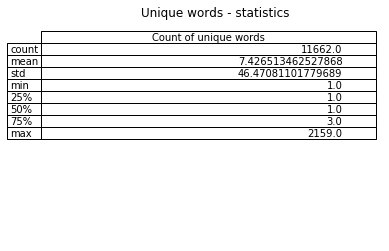

In [124]:
# Make dataframe with frequencies of the words
new = pd.DataFrame(df_bows.sum())
new.reset_index(level=0, inplace=True)
new.columns = ['token', 'Count of unique words']

# Create statistics table
import matplotlib.pyplot as plt
from pandas.plotting import table

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
plt.title('Unique words - statistics', pad=10.0)
#create the table plot and position it in the upper left corner
table(plot, new.describe(), loc='upper right')
#save the plot as a png file
plt.savefig('Data.png')

# Create dictionary word:frequency
frequencies = dict(zip(new.token, new['Count of unique words']))


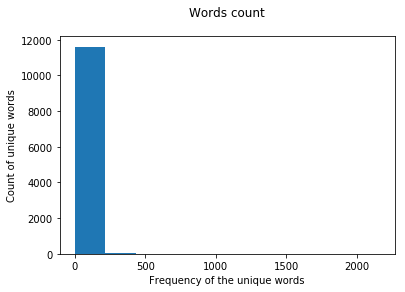

In [125]:
# create histogram of 50 most frequent words
new['Count of unique words'].hist(grid=False, bins=10)
plt.title('Words count', pad=20.0)
plt.ylabel('Count of unique words')
plt.xlabel('Frequency of the unique words')
plt.savefig('data_hist_nolog.png')

In [121]:
new_log = new
new_log['Count of unique words'] = np.log(new['Count of unique words'])
new_log.head()

,token,Count of unique words
0,0,1.609438
1,0089my,0.000000
2,00Please,0.000000
3,01,0.000000
4,0121 2025050,0.000000


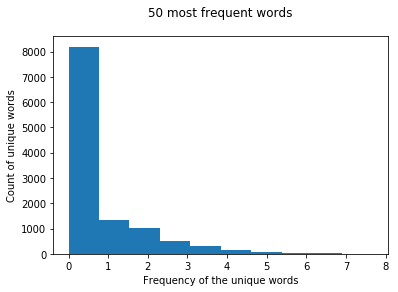

In [122]:
# create histogram of 50 most frequent words
new_log['Count of unique words'].hist(grid=False, bins=10)
plt.title('50 most frequent words', pad=20.0)
plt.ylabel('Count of unique words')
plt.xlabel('Frequency of the unique words')
plt.savefig('data_hist_log.png')

In [105]:
new_log["Count of unique words"].max()

7.677400430514807

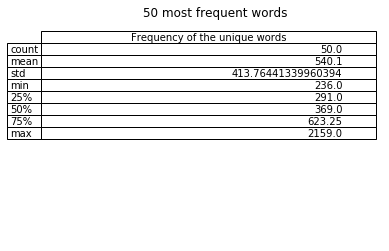

In [126]:
# create dataframe with 50 most frequent words
new_50 = new.nlargest(50, 'Count of unique words')
new_50.columns = ['token', 'Frequency of the unique words']

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
plt.title('50 most frequent words', pad=10.0)
#create the table plot and position it in the upper left corner
table(plot, new_50.describe(), loc='upper right')
#save the plot as a png file
plt.savefig('Data_50.png')

In [70]:
new_50.head()

,token,Count of unique words
10797,to,2159.0
11598,you,1815.0
2483,I,1501.0
4714,a,1340.0
10675,the,1210.0


In [84]:
#new.to_dict()

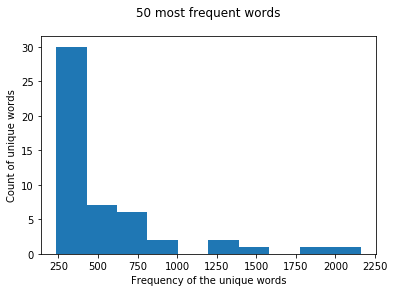

In [127]:
# create histogram of 50 most frequent words
new_50['Frequency of the unique words'].hist(grid=False, bins=10)
plt.title('50 most frequent words', pad=20.0)
plt.ylabel('Count of unique words')
plt.xlabel('Frequency of the unique words')
plt.savefig('data_hist_50.png')

In [29]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

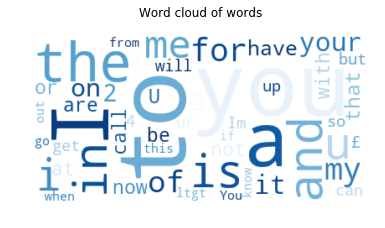

In [81]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", colormap='Blues').generate_from_frequencies(frequencies)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud of words', pad=20.0)
plt.show()
# Save the image in the img folder:
wordcloud.to_file("Data_wordcloud.png")

In [31]:
new.token.values

array(['to', 'you', 'I', 'a', 'the', 'and', 'in', 'is', 'u', 'i', 'me',
       'for', 'my', 'of', 'your', 'it', 'on', '2', 'have', 'that', 'call',
       'are', 'now', 'or', 'be', 'not', 'at', 'with', 'U', 'get', 'will',
       '£', 'can', 'Im', 'so', '4', 'ur', 'but', 'up', 'do', 'ltgt',
       'You', 'from', 'out', 'know', 'go', 'just', 'if', 'this', 'when'],
      dtype=object)

In [78]:

# Create dictionary word:frequency
frequencies_50 = dict(zip(new_50.token, new_50['Frequency of occurence of the unique words']))

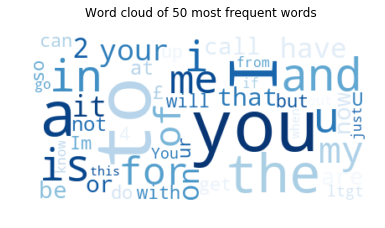

In [82]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", colormap='Blues').generate_from_frequencies(frequencies_50)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud of 50 most frequent words', pad=20.0)
plt.show()
# Save the image in the img folder:
wordcloud.to_file("Data_50_wordcloud.png")